In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import signal
import random

In [ ]:
photodiode_data = pd.read_csv('photodiode_test.csv')
photodiode_data = photodiode_data.iloc[::10, :]
photodiode_bool = photodiode_data > np.mean(photodiode_data)
print(photodiode_data)

In [14]:
log_path = '/Users/raphaelb/Documents/UW/Research/gridlab/adbs_ocd/misc/Approach Avoidance Task-selected/aact_logs/test/test/logger_2023-09-26_12.09.46.177633_v1.0.0.csv' #'../logger/aDBS009/logger_31-08-2023_13:05:00.702599_v1.0.0.csv'
task_events = pd.read_csv(log_path)
datetime_objects = [datetime.strptime(i, '%d-%m-%Y %H:%M:%S.%f') for i in task_events['timestamp']] 
task_events.insert(1, "datetime", datetime_objects, True)
task_events

,timestamp,datetime,subject,block_type,block,trial,state,event,extra_comments
0,26-09-2023 12:09:55.171857,2023-09-26 12:09:55.171857,test,conflict,1,1,start,0,Start Block (Pressed Spacebar)
1,26-09-2023 12:09:55.174858,2023-09-26 12:09:55.174858,test,conflict,1,1,start,2,Start Trial Fix Gaze (Begin)
2,26-09-2023 12:09:56.376574,2023-09-26 12:09:56.376574,test,conflict,1,1,start,3,Start Trial Fix Gaze (End)
3,26-09-2023 12:09:56.379588,2023-09-26 12:09:56.379588,test,conflict,1,1,start,4,Display Trial Options
4,26-09-2023 12:09:56.382576,2023-09-26 12:09:56.382576,test,conflict,1,1,start,1,Circle
5,26-09-2023 12:09:56.888494,2023-09-26 12:09:56.888494,test,conflict,1,1,start,5,Stimulius Anticipation Fix Gaze (Start)
6,26-09-2023 12:09:58.179713,2023-09-26 12:09:58.179713,test,conflict,1,1,start,6,Stimulius Anticipation Fix Gaze (End)
7,26-09-2023 12:09:58.201716,2023-09-26 12:09:58.201716,test,conflict,1,1,start,7,/provocation-images/test/neutral/4.jpg
8,26-09-2023 12:10:00.167990,2023-09-26 12:10:00.167990,test,conflict,1,1,start,8,End Stimulus
9,26-09-2023 12:10:00.172009,2023-09-26 12:10:00.172009,test,conflict,1,1,start,9,Reward Anticipation Fix Gaze (Start)


511635


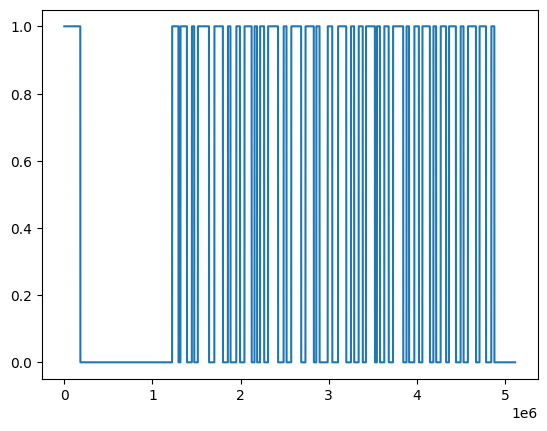

In [13]:
print(len(photodiode_bool))
# plt.plot(np.diff(photodiode_data.iloc[:,0]))#
plt.plot(photodiode_bool)
# plt.plot(~event_bools*.75)
# plt.xlim([1e6,2e6])


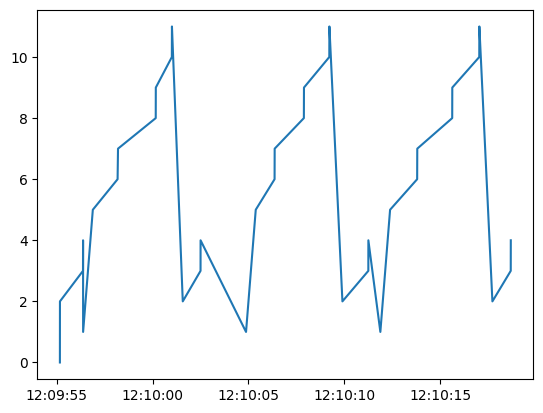

In [15]:
plt.plot(task_events['datetime'],task_events['event'])

In [14]:
task_duration = (task_events['datetime'].iloc[-1]-task_events['datetime'].iloc[0]).total_seconds()
print('Task Log Duration = ',task_duration, 'seconds')
phototiode_task_estimated_fs = (4.8796e5-1.22334e5)/task_duration
print('Calculated Photodiode Data fs = ',phototiode_task_estimated_fs, 'Hz')
photodiode_total_duration = len(photodiode_bool) / phototiode_task_estimated_fs
print('photodiode data duration = ', photodiode_total_duration, 'seconds')
photodiode_start_time = task_events['datetime'].iloc[0] - timedelta(seconds=1.22334e5 / phototiode_task_estimated_fs)

Task Log Duration =  77.969388 seconds
Calculated Photodiode Data fs =  4689.353211288512 Hz
photodiode data duration =  109.10566488537468 seconds


In [15]:
t = pd.date_range(start=photodiode_start_time,end=photodiode_start_time+timedelta(seconds=photodiode_total_duration),periods=len(photodiode_bool))
photodiode_timestamps = t.values
event_bools = np.zeros(len(photodiode_timestamps),dtype=bool).reshape(-1,1)
alignment_events = task_events.loc[task_events['event'].isin([2,3,5,6,9,10])]

event_count = 1
is_event = False
for i in range(len(event_bools)):
    if event_count<len(alignment_events) and photodiode_timestamps[i] >= alignment_events['datetime'].iloc[event_count]:
        is_event = not is_event
        event_count = event_count + 1
    event_bools[i] = is_event


(19600.54515529492, 19600.546093197558)

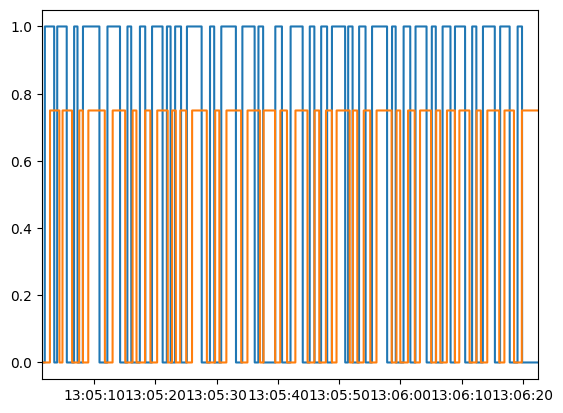

In [69]:
plt.plot(photodiode_timestamps,photodiode_bool)
plt.plot(photodiode_timestamps,event_bools*.75)
plt.xlim([photodiode_timestamps[int(1.2e5)],photodiode_timestamps[int(5e5)]])


In [60]:
photodiode_bool = np.array(photodiode_bool,dtype=int)
event_bools = np.array(event_bools,dtype=int)
correlation = signal.correlate(photodiode_bool,event_bools)
# plt.plot(correlation)
shift = np.argmax(correlation) - len(photodiode_bool)
print(shift)
micro_shift = int(shift/phototiode_task_estimated_fs *1e6)
aligned_events_timestmap = photodiode_timestamps + np.timedelta64(micro_shift,'us')


-3861


(19600.54515529492, 19600.545846381076)

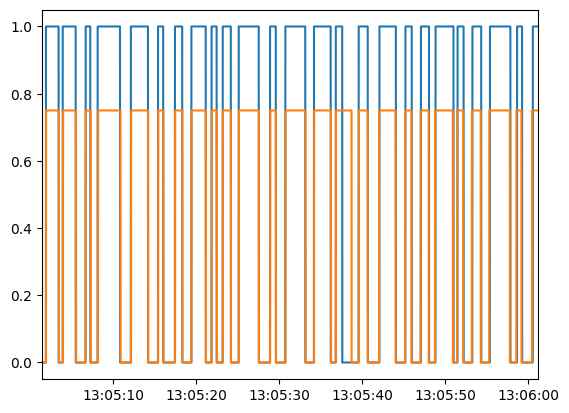

In [70]:
plt.plot(photodiode_timestamps,photodiode_bool)
plt.plot(aligned_events_timestmap,event_bools*.75)
plt.xlim([photodiode_timestamps[int(1.2e5)],photodiode_timestamps[int(4e5)]])


50.1875


(array([16., 17., 24., 15., 18., 21., 22., 22., 19., 30., 18., 20., 25.,
        23., 16., 23., 18., 24., 24., 16., 16., 22., 18., 21., 24.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

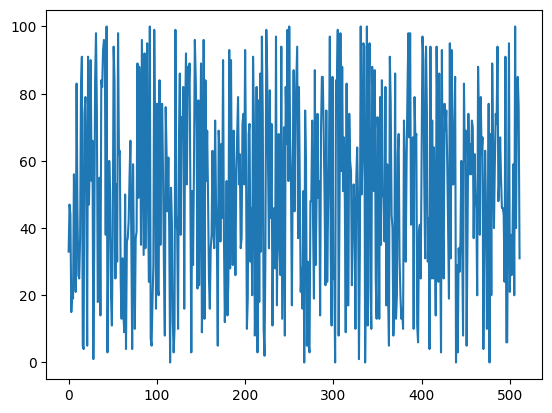

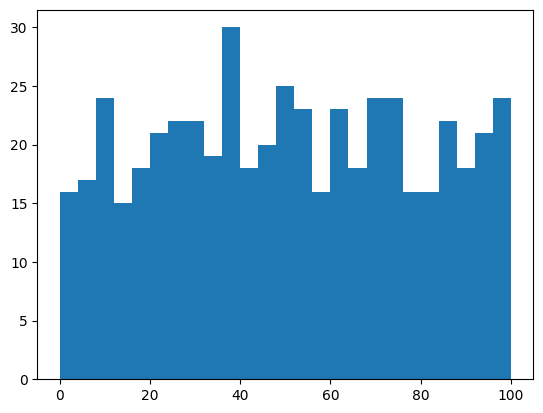

In [34]:
a = [random.randint(0, 100) for i in range(512)]
plt.plot(a)
print(np.mean(a))
plt.figure()
plt.hist(a,25)


In [37]:
random_values = {"value" : a}
random_values = pd.DataFrame(random_values)
print(random_values)
random_values.to_csv('random_values.csv')

     value
0       33
1       47
2       44
3       15
4       21
..     ...
507     40
508     80
509     85
510     76
511     31

[512 rows x 1 columns]


array(['2023-08-31T13:04:35.827548000', '2023-08-31T13:04:35.827761249',
       '2023-08-31T13:04:35.827974498', ...,
       '2023-08-31T13:06:24.932786501', '2023-08-31T13:06:24.932999750',
       '2023-08-31T13:06:24.933213000'], dtype='datetime64[ns]')